# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

# Toy task - only 2 features

In [ ]:
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [ ]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()

In [ ]:
plot_dataset(classification_problem)

In [ ]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.3,
    random_state=1,
)

# Let's build our model!

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

In [ ]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

In [ ]:
predictions

### And visualize

In [ ]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [ ]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [ ]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50, 
    n_classes=3,
    n_redundant=50, 
    n_clusters_per_class=1,
    random_state=42,
)

In [ ]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    hard_problem[0], 
    hard_problem[1], 
    test_size=0.3,
    random_state=1,
)

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

In [ ]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

## Or not so good...

In [ ]:
def train_knn_classifier(dimensions, n_classes):
    scores = []
    
    for dim in dimensions:
        problem = datasets.make_classification(n_samples=1000, n_features=dim, n_informative=dim // 2, 
                                               n_classes=5, n_redundant=dim // 2, 
                                               n_clusters_per_class=1, random_state=42)

        train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = metrics.accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(16, 9))
    plt.plot(dimensions, scores)
    plt.show()

In [ ]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Практическое задание

Решить задачу классификации с помощью метода К ближайших соседей (kNN classifier).
Обучить модель KNN Classifier для классификации на 3 класса.


In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ./wine_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('wine_data.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# посмотрим на соотношение типов 
dataset[0].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: 0, dtype: float64

In [4]:
# подготовим данные 
X = dataset.drop(0, axis=1)
y = dataset[0]

In [5]:
# разделим наши данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(36,)


### Обучить модель KNN Classifier для классификации на 3 класса

In [6]:
# n_jobs=-1 вкл параллельные вычисление, ускорение вычислений
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_model = knn.fit(X_train, y_train)

In [7]:
knn_result = knn_model.score(X_test, y_test)
print(f'Точность модели: {knn_result}')

Точность модели: 0.8055555555555556


## Детальные метрики

In [8]:
y_true, y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



## Матрица ошибок

In [9]:
confusion_matrix(y_true, y_pred)

array([[12,  0,  2],
       [ 1, 11,  2],
       [ 1,  1,  6]])

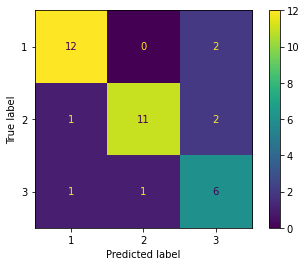

In [10]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show() 

In [11]:
def measure_quality(predictions):
    return accuracy_score(y_test, predictions)

In [12]:
print(measure_quality(y_pred))

0.8055555555555556


In [13]:
# Проведем тест, посмотрим на погрешности
def err_plot():
    err = []
    k = 50
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        err.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k), err, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.title('Соотношение погрешности к значению К')
    plt.xlabel('К')
    plt.ylabel('Погрешность')

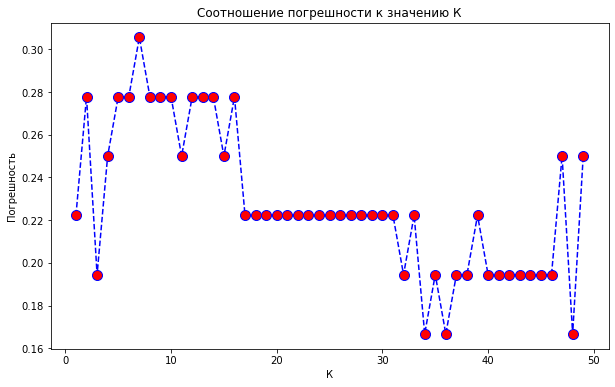

In [14]:
# Визуализация погрешностей
err_plot()

### На графике видим, что самые малые погрешности у нас при значение К=34, К=36 и К=48 

### Возьмем К=34

In [15]:
knn = KNeighborsClassifier(n_neighbors=34, n_jobs=-1)
knn_model = knn.fit(X_train, y_train)

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
print(measure_quality(y_pred))

0.8333333333333334


# Видим, что оценка точности возросла 

## А если приведем данные к стандартному виду 

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

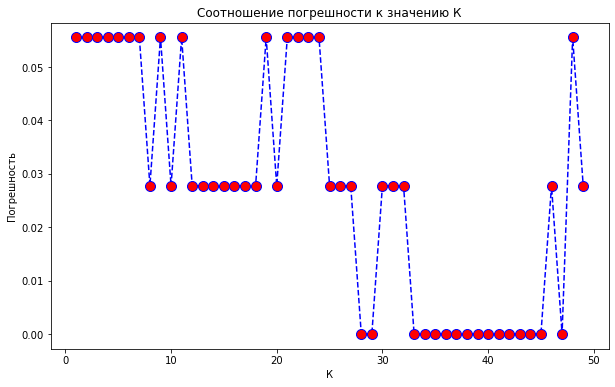

In [19]:
# еще раз построим график 
err_plot()

### Видим, что при К=28 погрешность равна нулю 

In [20]:
knn = KNeighborsClassifier(n_neighbors=28, n_jobs=-1)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(measure_quality(y_pred))

1.0


## И получаем оценку точности равная 1